In [ ]:
train = pd.read_csv("dataset/train.csv")

In [ ]:
root_classes_folder = "dataset/trainclasses"
dataset = Dataset("dataset")
sub_dataset_train_path = "/".join([root_classes_folder, "train"])
sub_dataset_dev_path = "/".join([root_classes_folder, "dev"])
files_number = len(dataset_train_label)
print("Sorting", files_number, "images into", root_classes_folder)

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


import random

from keras.preprocessing import image
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, Lambda
from keras.optimizers import SGD, RMSprop
from keras import backend as K
import pandas as pd

from keras.layers import Input, Conv2D, Lambda, merge, Dense, Flatten,MaxPooling2D
from keras.models import Model, Sequential
from keras.regularizers import l2
from keras import backend as K
from keras.optimizers import SGD,Adam
from keras.losses import binary_crossentropy
import numpy.random as rng
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
%matplotlib inline

C:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
y_train[0]

5

In [7]:
train.head(2)

NameError: name 'train' is not defined

In [8]:
img = image.load_img("./dataset/train/0000e88ab.jpg", target_size=(200, 100, 3))
x = image.img_to_array(img)
img1 = image.load_img("./dataset/train/0000e88ab.jpg", target_size=(200, 100, 3))
y = image.img_to_array(img1)

In [9]:
a = np.concatenate([[x],[y]], axis = 0)

In [10]:
a.shape

(2, 200, 100, 3)

In [11]:
a = np.array([[[1, 2], [3, 4]]])
b = np.array([[[5, 6], [7, 8]]])
np.vstack([a,b])

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [28]:
train_data = pd.read_csv("dataset/train.csv")
train_data.head(2)

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a


In [13]:
import time
time1 = time.time()
df_train.set_index('Id', inplace=True)
df_train.sort_index(inplace=True)
df_train.head(30)

for i in range(5000):
    df_train.loc[df_train.index=='new_whale']
    
print(time.time()-time1)

NameError: name 'df_train' is not defined

In [14]:
#df_train.set_index('Id', inplace=True)
time1 = time.time()
df_train.head(30)

for i in range(5000):
    df_train.loc[df_train.Id=='new_whale']
print(time.time()-time1)

NameError: name 'df_train' is not defined

In [27]:
import time
RANDOM_SEED = 1475

train_data = pd.read_csv("dataset/train.csv")
time1 = time.time()
train_data.set_index('Id', inplace=True)
train_data.sort_index(inplace=True)
fake_data = []
real_data = []
k=0

for sub_index in set(train_data.index):
    if sub_index!="new_whale":
        print(k)
        #print(sub_index)
        k+=1
        images_same_class = list(set(train_data.loc[train_data.index==sub_index].Image))
        images_different_class = list(set(train_data.loc[train_data.index!=sub_index].Image))

        for i in range(len(images_same_class)):
            for j in range(i, len(images_same_class)):
                real_data.append(np.array([images_same_class[i], images_same_class[j],1]))
                fake_data.append(np.array([images_same_class[i], images_different_class[np.random.randint(len(images_different_class))],0]))
                fake_data.append(np.array([images_same_class[i], images_different_class[np.random.randint(len(images_different_class))],0]))

fake_data = np.vstack(fake_data)
real_data = np.vstack(real_data)

total_data = np.concatenate([fake_data, real_data])
np.random.shuffle(total_data)

print((time.time()-time1)/60)

            
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069


3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715


In [ ]:
total_data = np.concatenate([fake_data, real_data])
total_data.shape

In [ ]:
total_data = np.concatenate([fake_data, real_data])
np.random.shuffle(total_data)

In [121]:
batch_sz = 32
number_iteration_train = len(total_data)/batch_sz
dataset = "train"

"""for i in range(number_iteration_train):"""
i=0
batch_data=total_data[i*batch_sz:(i+1)*(batch_sz)]
image_left, image_right = [],[]
targets = []
for fig in batch_data:
    image_left.append(np.array([image.img_to_array(image.load_img("./dataset/"+dataset+"/"+fig[0], target_size=(100, 200, 3)))]))
    image_right.append(np.array([image.img_to_array(image.load_img("./dataset/"+dataset+"/"+fig[1], target_size=(100, 200, 3)))]))
    targets.append(np.array([int(fig[2])]))
image_left = np.vstack(image_left)
image_right = np.vstack(image_right)
targets = np.vstack(targets)
total_image = np.vstack([[image_left],[image_right]])
final = [image_left,image_right]

In [129]:
k=0
for i in range(len(targets)):
    if targets[i,0]==0:
        k+=1

In [130]:
k

18

AttributeError: 'AxesImage' object has no attribute 'shape'

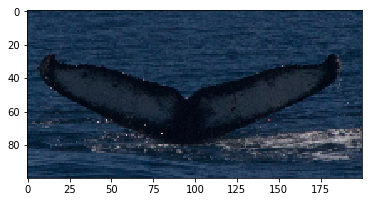

In [145]:
imshow((image.load_img("./dataset/train/"+batch_data[8,0],target_size=(100,200,1))))

In [82]:
total_image.shape

(2, 32, 100, 200, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(100, 200, 3)
(100, 200, 3)
(100, 200, 3)


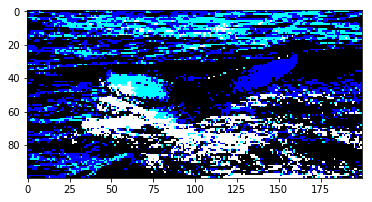

In [59]:
from keras.applications.resnet50 import preprocess_input

a = image.img_to_array(image.load_img("./dataset/train/0000e88ab.jpg", target_size=(100, 200,3)))
imshow(a)
print(a.shape)
#a = np.expand_dims(a, axis=0)
print(a.shape)
b= preprocess_input(a)
print(b.shape)
#print(b==a)
#print(b[0])
imshow(a)

In [ ]:
total_data[:10]

for i in range()

In [ ]:
np.ones((171268,1))

In [18]:
len(set(train_data.index))

25361

In [25]:
import random
random.uniform(0, 1)

0.6551489553997184

## Décision sur le test set

Il y a 5005 classes différentes d'images parmi les 25 361 proposées, il y a 1647 classes avec plus ou moins que 3 images, 2932 avec plus que 2 images et 806 avec plus que 5. Nous allons donc sélectionner pour le test set une proportion de catégories venant de cette catégorie des images à plus de 3 images, pour pouvoir faire une comparaison aux dites classes (rapide réapprentissage sur les classes en question avec 2images et des exemples puis test pour savoir à laquelle des classes appartiennent les exemples.)

In [24]:
train_data = pd.read_csv("dataset/train.csv")
time1 = time.time()
train_data.set_index('Id', inplace=True)
train_data.sort_index(inplace=True)

k=0
for sub_index in set(train_data.index):
    if len(set(train_data.loc[train_data.index==sub_index].Image))>=5:
         k+=1
print(k)

print((time.time()-time1)/60)

806
0.17502200206120808


In [ ]:
import numpy as np
np.random.seed(1337)  # for reproducibility

import random
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, Lambda
from keras.optimizers import SGD, RMSprop
from keras import backend as K

class Dataset:
    """
    Manage dataset loading
    
    :param dataset_path: str, path to the dataset folder
    """
    
    def __init__(self, dataset_path):
        
        # Build and store dataset paths
        self.dataset_path_train = dataset_path + "/train"
        self.dataset_path_test = dataset_path + "/test"
        
        # Build train.csv path
        self.dataset_path_train_label = dataset_path + "/train.csv"
        
        # Generate pandas dataframe of whales id <-> file matching
        self.dataset_train_label = self.get_train_label()
        
        ## Get pictures paths
#         self.les_im_path_train = self.get_im_path(self.dataset_path_train + "/*.jpg")
#         self.les_im_path_test = self.get_im_path(self.dataset_path_test + "/*.jpg")
        
    def get_im_path(self, dataset_path):
        """
        Get pictures path under the given folder path
        :param dataset_path: str, path to the dataset folder
        
        :output les_im_path: list of string, .jpg picture paths under the dataset_path folder
        """
        print("Getting images path from", dataset_path)
        les_im_path = glob.glob(dataset_path)
        les_im_path.sort()
        return les_im_path
    
    def get_train_label(self):
        """
        Load the train dataset annotation using pandas
        
        :return train_label: pandas dataframe, whales id <-> files matching
        """
        print("Loading", self.dataset_path_train_label)
        return pd.read_csv(self.dataset_path_train_label)
    
    
    def create_folder_is_needed(self, folder_path):
        """
        Create a folder if it doesn't alreadt exist
        :param folder_path: str
        """
        if not os.path.isdir(folder_path):
            os.mkdir(folder_path)

    
    def split_in_classes_folders(self, root_classes_folder, pass_new_whale=True, remove_old=True, train_dev_ratio=0.2):
        """
        Split the dataset into classes folders
        :param root_classes_folder:
        :param pass_new_whale: boolean, set to true if not considering new_whale id
        
        OUTPUT:
            pictures sort by whale id into subfolders of the root_classes_folder
        """
        
        """if remove_old:
            print("Removing previous spliting")
            shutil.rmtree(root_classes_folder)"""
        
        sub_dataset_train_path = "/".join([root_classes_folder, "train"])
        sub_dataset_dev_path = "/".join([root_classes_folder, "dev"])
        
        
        # Create the folders needed
        created_folder_path_train_fake = "dataset/siamesedata/train/fake"
        created_folder_path_train_real = "dataset/siamesedata/train/real"
        created_folder_path_dev_fake = "dataset/siamesedata/dev/fake"
        created_folder_path_dev_real = "dataset/siamesedata/dev/real"
        
        self.create_folder_is_needed(created_folder_path_train_fake)
        self.create_folder_is_needed(created_folder_path_train_real)
        self.create_folder_is_needed(created_folder_path_dev_fake)
        self.create_folder_is_needed(created_folder_path_dev_real)
        
        # If passing new whales, should remove previous folder
        new_whale_folder_path = "/".join([root_classes_folder, "new_whale"])
        if pass_new_whale and os.path.isdir(new_whale_folder_path):
            print("Removing new_whale folder")
            shutil.rmtree(new_whale_folder_path)
        
        # Sorting the images
        files_number = len(self.dataset_train_label)
        print("Sorting", files_number, "images into", root_classes_folder)
        
        for index, row in self.dataset_train_label.iterrows():
            print("#" + str(index + 1) + "/" + str(files_number), end="\r")
            whale_file_name = row['Image']
            whale_id = row['Id']
            if pass_new_whale and whale_id == "new_whale":
                continue
            
            ## Choose if storing in train of dev dataset
            if len(glob.glob("/".join([sub_dataset_train_path, whale_id]))):
                if random.uniform(0, 1) >= 0.2:
                    # We store in train dataset
                    sub_dataset_path = sub_dataset_train_path
                else:
                    # We store in dev dataset
                    sub_dataset_path = sub_dataset_dev_path
            else:
                sub_dataset_path = sub_dataset_train_path
            
            self.create_folder_is_needed("/".join([sub_dataset_path, whale_id]))
            shutil.copy(
                "/".join([self.dataset_path_train, whale_file_name]), 
                "/".join([sub_dataset_path, whale_id, whale_file_name])
            )
        print("Done" + " "*20)
        
        ## Removing folder that doesn't have a dev equivalent
        for train_path in glob.glob(sub_dataset_train_path + "/*/"):
            in_train_id = train_path.split("/")[-2]
            equivalent_dev_id_path = "/".join([sub_dataset_dev_path, in_train_id])
            if not os.path.isdir(equivalent_dev_id_path):
                shutil.rmtree(train_path)
            
# Create the dataset object
#dataset = Dataset("dataset")
# Split the dataset into the train_classes folder
#dataset.split_in_classes_folders("dataset/train_classes")



class DataGenerator(object):
    """docstring for DataGenerator"""
    def __init__(self, batch_sz, train):
        # the data, shuffled and split between train and test sets
        #dataset = Dataset("dataset")
        #sub_dataset_train_path = "/".join([root_classes_folder, "train"])
        #sub_dataset_dev_path = "/".join([root_classes_folder, "dev"])
        
        # Create the folders needed
        created_folder_path_train_fake = "dataset/siamesedata/train/fake"
        created_folder_path_train_real = "dataset/siamesedata/train/real"
        created_folder_path_dev_fake = "dataset/siamesedata/dev/fake"
        created_folder_path_dev_real = "dataset/siamesedata/dev/real"
        
        self.create_folder_is_needed(created_folder_path_train_fake)
        self.create_folder_is_needed(created_folder_path_train_real)
        self.create_folder_is_needed(created_folder_path_dev_fake)
        self.create_folder_is_needed(created_folder_path_dev_real)
        
        
        #Load the data 
        data_train = pd.read_csv("./dataset/train.csv")
        fig = "train"
        
        real_data, fake_data = load_fake_real_data(data_train)
        
        total_data = np.concatenate()
        
        
            
        
        
        
        list_X_train = []
        for fig in data_train['Image']:
            img = image.load_img("./dataset/"+dataset+"/"+fig, target_size=(200, 100, 3))
            x = image.img_to_array(img)
            list_train.append([x])
        X_train = np.vstack(list_X_train)
            
        y_train, label_encoder = prepare_labels(data_train['Id'])
        
            
            
        
        X_train, y_train
        , (X_test, y_test) = mnist.load_data()
        X_train = X_train.reshape(60000, 784)
        X_test = X_test.reshape(10000, 784)
        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')
        X_train /= 255
        X_test /= 255



        self.batch_sz = batch_sz
        self.samples_per_train  = (self.tr_pairs.shape[0]/self.batch_sz)*self.batch_sz
        self.samples_per_val    = (self.te_pairs.shape[0]/self.batch_sz)*self.batch_sz


        self.cur_train_index=0
        self.cur_val_index=0
    def load_fake_real_data(train_data):
        print("Loading...")
        train_data.set_index('Id', inplace=True)
        train_data.sort_index(inplace=True)
        fake_data = []
        real_data = []
        #k=0

        for sub_index in set(train_data.index):
            if sub_index!="new_whale":
                #print(k)
                #print(sub_index)
                #k+=1
                images_same_class = list(set(train_data.loc[train_data.index==sub_index].Image))
                images_different_class = list(set(train_data.loc[train_data.index!=sub_index].Image))

                for i in range(len(images_same_class)):
                    for j in range(i, len(images_same_class)):
                        real_data.append(np.array([images_same_class[i], images_same_class[j],1]))
                        fake_data.append(np.array([images_same_class[i], images_different_class[np.random.randint(len(images_different_class))],0]))
                        fake_data.append(np.array([images_same_class[i], images_different_class[np.random.randint(len(images_different_class))],0]))
        
        fake_data = np.vstack(fake_data)
        real_data = np.vstack(real_data)
        print("Fake and Real data generated for siamese training.")
        return real_data, fake_data

    def prepare_labels(y):
        values = np.array(y)
        label_encoder = LabelEncoder()
        integer_encoded = label_encoder.fit_transform(values)
        # print(integer_encoded)

        onehot_encoder = OneHotEncoder(sparse=False)
        integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
        onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
        # print(onehot_encoded)

        y = onehot_encoded
        # print(y.shape)
        return y, label_encoder

    def create_pairs(self, x, digit_indices):
        '''Positive and negative pair creation.
        Alternates between positive and negative pairs.
        '''
        pairs = []
        labels = []
        n = min([len(digit_indices[d]) for d in range(10)]) - 1
        for d in range(10):
            for i in range(n):
                z1, z2 = digit_indices[d][i], digit_indices[d][i+1]
                pairs += [[x[z1], x[z2]]]
                inc = random.randrange(1, 10)
                dn = (d + inc) % 10
                z1, z2 = digit_indices[d][i], digit_indices[dn][i]
                pairs += [[x[z1], x[z2]]]
                labels += [1, 0]
        return np.array(pairs), np.array(labels)

    def next_train(self):
        while 1:
            self.cur_train_index += self.batch_sz
            if self.cur_train_index >= self.samples_per_train:
                self.cur_train_index=0
            yield ([    self.tr_pairs_0[self.cur_train_index:self.cur_train_index+self.batch_sz], 
                        self.tr_pairs_1[self.cur_train_index:self.cur_train_index+self.batch_sz]
                    ],
                    self.tr_y[self.cur_train_index:self.cur_train_index+self.batch_sz]
                )

    def next_val(self):
        while 1:
            self.cur_val_index += self.batch_sz
            if self.cur_val_index >= self.samples_per_val:
                self.cur_val_index=0
            yield ([    self.te_pairs_0[self.cur_val_index:self.cur_val_index+self.batch_sz], 
                        self.te_pairs_1[self.cur_val_index:self.cur_val_index+self.batch_sz]
                    ],
                    self.te_y[self.cur_val_index:self.cur_val_index+self.batch_sz]
                )

def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)


def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    return K.mean(y_true * K.square(y_pred) + (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))


def create_base_network(input_dim):
    '''Base network to be shared (eq. to feature extraction).
    '''
    seq = Sequential()
    seq.add(Dense(128, input_shape=(input_dim,), activation='relu'))
    seq.add(Dropout(0.1))
    seq.add(Dense(128, activation='relu'))
    seq.add(Dropout(0.1))
    seq.add(Dense(128, activation='relu'))
    return seq


def compute_accuracy(predictions, labels):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return labels[predictions.ravel() < 0.5].mean()


input_dim = 784
nb_epoch = 20
batch_size=128

datagen = DataGenerator(batch_size)

# network definition
base_network = create_base_network(input_dim)

input_a = Input(shape=(input_dim,))
input_b = Input(shape=(input_dim,))

# because we re-use the same instance `base_network`,
# the weights of the network
# will be shared across the two branches
processed_a = base_network(input_a)
processed_b = base_network(input_b)

distance = Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([processed_a, processed_b])

model = Model(input=[input_a, input_b], output=distance)

# train
rms = RMSprop()
model.compile(loss=contrastive_loss, optimizer=rms)
model.fit_generator(generator=datagen.next_train(), samples_per_epoch=datagen.samples_per_train, nb_epoch=nb_epoch, validation_data=datagen.next_val(), nb_val_samples=datagen.samples_per_val)

# Siamese Model

In [2]:
def W_init(shape,name=None):
    """Initialize weights as in paper"""
    values = rng.normal(loc=0,scale=1e-2,size=shape)
    return K.variable(values,name=name)
#//TODO: figure out how to initialize layer biases in keras.
def b_init(shape,name=None):
    """Initialize bias as in paper"""
    values=rng.normal(loc=0.5,scale=1e-2,size=shape)
    return K.variable(values,name=name)

input_shape = (100, 200, 3)
left_input = Input(input_shape)
right_input = Input(input_shape)
#build convnet to use in each siamese 'leg'
convnet = Sequential()
convnet.add(Conv2D(64,(10,10),activation='relu',input_shape=input_shape,
                   kernel_initializer=W_init,kernel_regularizer=l2(2e-4)))
convnet.add(MaxPooling2D())
convnet.add(Conv2D(128,(7,7),activation='relu',
                   kernel_regularizer=l2(2e-4),kernel_initializer=W_init,bias_initializer=b_init))
convnet.add(MaxPooling2D())
convnet.add(Conv2D(128,(4,4),activation='relu',kernel_initializer=W_init,kernel_regularizer=l2(2e-4),bias_initializer=b_init))
convnet.add(MaxPooling2D())
convnet.add(Conv2D(256,(4,4),activation='relu',kernel_initializer=W_init,kernel_regularizer=l2(2e-4),bias_initializer=b_init))
convnet.add(Flatten())
convnet.add(Dense(4096,activation="sigmoid",kernel_regularizer=l2(1e-3),kernel_initializer=W_init,bias_initializer=b_init))

#call the convnet Sequential model on each of the input tensors so params will be shared
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)
#layer to merge two encoded inputs with the l1 distance between them
L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
#call this layer on list of two input tensors.
L1_distance = L1_layer([encoded_l, encoded_r])
prediction = Dense(1,activation='sigmoid',bias_initializer=b_init)(L1_distance)
siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)

optimizer = Adam(0.001)#Adam(0.001)#Adam(0.00006)
#//TODO: get layerwise learning rates and momentum annealing scheme described in paperworking
siamese_net.compile(loss="binary_crossentropy",optimizer=optimizer)

siamese_net.count_params()

Instructions for updating:
Colocations handled automatically by placer.


90344769

In [ ]:
class Siamese_Loader:
    """For loading batches and testing tasks to a siamese net"""
    def __init__(self, path="./dataset/train.csv", data_subsets = ["fake", "real"]):
        self.data = {}
        #self.categories = {}
        self.info = {}
        
        data_train = pd.read_csv(path)
        
        (real_data_train, fake_data_train), (real_data_test, fake_data_test),total_data_train = self.load_fake_real_data(data_train, test_percentage = 0.2)
        
        self.data['train']=total_data_train
        self.data['real_train'] = real_data_train
        self.data['fake_train'] = fake_data_train
        self.data['real_test'] = real_data_test
        self.data['fake_test'] = fake_data_test
        
        #Initiate iterator for batch purpose
        self.iterator_batch = 0
        
        """        for name in data_subsets:
            file_path = os.path.join(path, name + ".pickle")
            print("loading data from {}".format(file_path))
            with open(file_path,"rb") as f:
                (X,c) = pickle.load(f)
                self.data[name] = X
                self.categories[name] = c
        """
                
    def load_fake_real_data(self, train_data, test_percentage=0.2):
        print("Loading...")
        train_data.set_index('Id', inplace=True)
        train_data.sort_index(inplace=True)
        fake_data_train = []
        real_data_train = []
        fake_data_test = []
        real_data_test = []
        #k=0

        for sub_index in set(train_data.index):
            if sub_index!="new_whale":
                #print(k)
                #print(sub_index)
                #k+=1
                images_same_class = list(set(train_data.loc[train_data.index==sub_index].Image))
                images_different_class = list(set(train_data.loc[train_data.index!=sub_index].Image))
                
                if len(images_same_class) <=2 : #Condition for train
                    for i in range(len(images_same_class)):
                        for j in range(i, len(images_same_class)):
                            real_data_train.append(np.array([images_same_class[i], images_same_class[j],1]))
                            fake_data_train.append(np.array([images_same_class[i], images_different_class[np.random.randint(len(images_different_class))],0]))
                            fake_data_train.append(np.array([images_same_class[i], images_different_class[np.random.randint(len(images_different_class))],0]))
                else : #some_classes will be selected for testing
                    if random.uniform(0, 1)<test_percentage : 
                        for i in range(len(images_same_class)):
                            for j in range(i, len(images_same_class)):
                                real_data_test.append(np.array([images_same_class[i], images_same_class[j],1]))
                                fake_data_test.append(np.array([images_same_class[i], images_different_class[np.random.randint(len(images_different_class))],0]))
                                fake_data_test.append(np.array([images_same_class[i], images_different_class[np.random.randint(len(images_different_class))],0]))
                    else:
                        for i in range(len(images_same_class)):
                            for j in range(i, len(images_same_class)):
                                real_data_train.append(np.array([images_same_class[i], images_same_class[j],1]))
                                fake_data_train.append(np.array([images_same_class[i], images_different_class[np.random.randint(len(images_different_class))],0]))
                                fake_data_train.append(np.array([images_same_class[i], images_different_class[np.random.randint(len(images_different_class))],0]))
                        
        #Stacking the data
        real_data_train = np.vstack(real_data_train)
        fake_data_train = np.vstack(fake_data_train)
        
        real_data_test = np.vstack(real_data_test)
        fake_data_test = np.vstack(fake_data_test)
        
        #Shuffling
        train_data_shuffle = np.concatenate([fake_data_train, real_data_train])
        np.random.shuffle(train_data_shuffle)
        
        print("Fake and Real data generated for siamese training.")
        return (real_data_train, fake_data_train), (real_data_test,fake_data_test), train_data_shuffle

    def prepare_labels(self, y):
        values = np.array(y)
        label_encoder = LabelEncoder()
        integer_encoded = label_encoder.fit_transform(values)
        # print(integer_encoded)

        onehot_encoder = OneHotEncoder(sparse=False)
        integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
        onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
        # print(onehot_encoded)

        y = onehot_encoded
        # print(y.shape)
        return y, label_encoder

    def get_batch(self,batch_size,s="train"):
        """Create batch of n pairs, 1/3 same class, 2/3 different class"""
        
        
        number_iteration_train = len(self.data[s])/batch_size
        
        #Condition to reset the loop of iteration
        if self.iterator_batch>=number_iteration_train:
            self.iterator_batch = 0
            
        #For more readability
        i = self.iterator_batch
        
        #Let's load the batch
        batch_data=self.data[s][i*batch_size:(i+1)*(batch_size)]
        
        image_left, image_right, targets = [],[],[]
        for fig in batch_data:
            image_left.append(np.array([image.img_to_array(image.load_img("./dataset/"+s+"/"+fig[0], target_size=(100, 200, 3)))]))
            image_right.append(np.array([image.img_to_array(image.load_img("./dataset/"+s+"/"+fig[1], target_size=(100, 200, 3)))]))
            targets.append(np.array([int(fig[2])]))
        image_left = np.vstack(image_left)
        image_right = np.vstack(image_right)
        
        #Finally we get the elements of the batch
        targets = np.vstack(targets)
        pairs = [image_left,image_right]
        
        #iteration step
        self.iterator_batch +=1
        
        return pairs, targets

        """ X=self.data[s]
        n_classes, n_examples, w, h = X.shape

        #randomly sample several classes to use in the batch
        categories = rng.choice(n_classes,size=(batch_size,),replace=False)
        #initialize 2 empty arrays for the input image batch
        pairs=[np.zeros((batch_size, h, w,1)) for i in range(2)]
        #initialize vector for the targets, and make one half of it '1's, so 2nd half of batch has same class
        targets=np.zeros((batch_size,))
        targets[batch_size//2:] = 1
        for i in range(batch_size):
            category = categories[i]
            idx_1 = rng.randint(0, n_examples)
            pairs[0][i,:,:,:] = X[category, idx_1].reshape(w, h, 1)
            idx_2 = rng.randint(0, n_examples)
            #pick images of same class for 1st half, different for 2nd
            if i >= batch_size // 2:
                category_2 = category  
            else: 
                #add a random number to the category modulo n classes to ensure 2nd image has
                # ..different category
                category_2 = (category + rng.randint(1,n_classes)) % n_classes
            pairs[1][i,:,:,:] = X[category_2,idx_2].reshape(w, h,1)"""
        #return pairs, targets
    
    def generate(self, batch_size, s="train"):
        """a generator for batches, so model.fit_generator can be used. """
        while True:
            pairs, targets = self.get_batch(batch_size,s)
            yield (pairs, targets)    

    def make_oneshot_task(self,N,s="val",language=None):
        """Create pairs of test image, support set for testing N way one-shot learning. """
        X=self.data[s]
        n_classes, n_examples, w, h = X.shape
        indices = rng.randint(0,n_examples,size=(N,))
        if language is not None:
            low, high = self.categories[s][language]
            if N > high - low:
                raise ValueError("This language ({}) has less than {} letters".format(language, N))
            categories = rng.choice(range(low,high),size=(N,),replace=False)
            
        else:#if no language specified just pick a bunch of random letters
            categories = rng.choice(range(n_classes),size=(N,),replace=False)            
        true_category = categories[0]
        ex1, ex2 = rng.choice(n_examples,replace=False,size=(2,))
        test_image = np.asarray([X[true_category,ex1,:,:]]*N).reshape(N, w, h,1)
        support_set = X[categories,indices,:,:]
        support_set[0,:,:] = X[true_category,ex2]
        support_set = support_set.reshape(N, w, h,1)
        targets = np.zeros((N,))
        targets[0] = 1
        targets, test_image, support_set = shuffle(targets, test_image, support_set)
        pairs = [test_image,support_set]

        return pairs, targets
    
    def test_oneshot(self,model,N,k,s="val",verbose=0):
        """Test average N way oneshot learning accuracy of a siamese neural net over k one-shot tasks"""
        n_correct = 0
        if verbose:
            print("Evaluating model on {} random {} way one-shot learning tasks ...".format(k,N))
        for i in range(k):
            inputs, targets = self.make_oneshot_task(N,s)
            probs = model.predict(inputs)
            if np.argmax(probs) == np.argmax(targets):
                n_correct+=1
        percent_correct = (100.0*n_correct / k)
        if verbose:
            print("Got an average of {}% {} way one-shot learning accuracy".format(percent_correct,N))
        return percent_correct
    
    def train(self, model, epochs, verbosity):
        model.fit_generator(self.generate(batch_size),use_multiprocessing=True
                            
                             )
    
    
#Instantiate the class
loader = Siamese_Loader()

Loading...
Fake and Real data generated for siamese training.


In [ ]:
#Training loop
print("Starting the training loop...")
evaluate_every = 1 # interval for evaluating on one-shot tasks
loss_every=30 # interval for printing loss (iterations)
batch_size = 32
n_iter = 2000
N_way = 20 # how many classes for testing one-shot tasks>
n_val = 250 #how mahy one-shot tasks to validate on?
best = -1
#weights_path = os.path.join(PATH, "weights")
print("...Training...")
for i in range(1, n_iter):
    (inputs,targets)=loader.get_batch(batch_size)
    loss=siamese_net.train_on_batch(inputs,targets)
    print(loss)
    """if i % evaluate_every == 0:
        print("evaluating")
        #val_acc = loader.test_oneshot(siamese_net,N_way,n_val,verbose=True)
        if val_acc >= best:
            print("saving")
            siamese_net.save(weights_path)
            best=val_acc"""

    if i % loss_every == 0:
        print("iteration {}, training loss: {:.2f},".format(i,loss))

Starting the training loop...
...Training...
Instructions for updating:
Use tf.cast instead.
9.727813
9.423544
9.045653
8.559507
8.092237
7.5816007
7.1634326
6.7693386
6.3777413
5.9576173
5.6312404
5.3106937
5.032763
4.7815604
4.5645366
4.315925
4.0785484
3.8876936
3.7209647
3.5544074
3.4259174
3.2728221
3.1917949
3.015964
2.9290035
2.8290207
2.700483
2.6537993
2.5111907
2.4818988
iteration 30, training loss: 2.48,
2.3224535
2.2831242
2.16628
2.1483383
2.076358
1.9814948
1.9293793
1.9138683
1.8853608
1.7707943
1.7240087
1.6571767
1.5847319
1.5478137
1.4616474
1.5511427
1.536167
1.4602491
1.3616055
1.3239403
1.2988313
1.2885498
1.3692617
1.2982372
1.3356171
1.2060045
1.2477769
1.1485319
1.1303594
1.2200679
iteration 60, training loss: 1.22,
1.213852
1.0589833
1.0704268
1.0398974
1.1960802
1.0699394
1.0746479
1.0389178
1.0250759
1.0004714
1.0088308
1.0411085
1.0105866
0.9503114
1.016603
0.92131704
0.8857737
0.96479565
0.98774296
0.8531345
1.001162
0.90071005
0.96222264
0.982734
0.9191402

In [ ]:
#Training loop
print("!")
evaluate_every = 1 # interval for evaluating on one-shot tasks
loss_every=50 # interval for printing loss (iterations)
batch_size = 32
n_iter = 90000
N_way = 20 # how many classes for testing one-shot tasks>
n_val = 250 #how mahy one-shot tasks to validate on?
best = -1
weights_path = os.path.join(PATH, "weights")
print("training")
for i in range(1, n_iter):
    (inputs,targets)=loader.get_batch(batch_size)
    loss=siamese_net.train_on_batch(inputs,targets)
    print(loss)
    if i % evaluate_every == 0:
        print("evaluating")
        #val_acc = loader.test_oneshot(siamese_net,N_way,n_val,verbose=True)
        if val_acc >= best:
            print("saving")
            siamese_net.save(weights_path)
            best=val_acc

    if i % loss_every == 0:
        print("iteration {}, training loss: {:.2f},".format(i,loss))